In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [15]:
from sklearn.metrics  import mean_absolute_percentage_error

# What we did last week

### Importing and fixing up the DataFrame

In [16]:
df = pd.read_csv('RestaurantVisitors.csv', index_col = 'date', parse_dates = True)
df.index.freq = 'D'
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [17]:
df1 = df.dropna()
df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


In [18]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in cols:
    df1[col] = df1[col].astype(int)

df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90


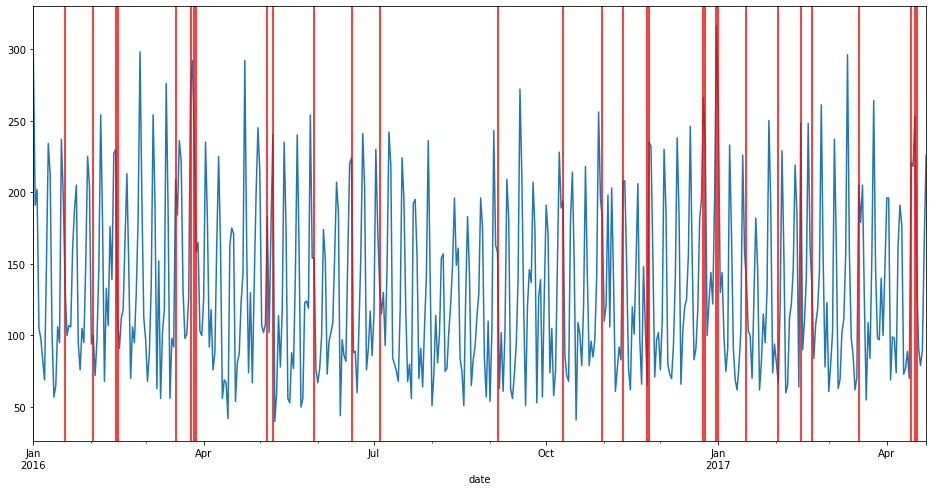

In [58]:
plt.rc("figure", figsize = (16, 8))
ax = df1['total'].plot()
for x in df1.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

### Seasonal decompose

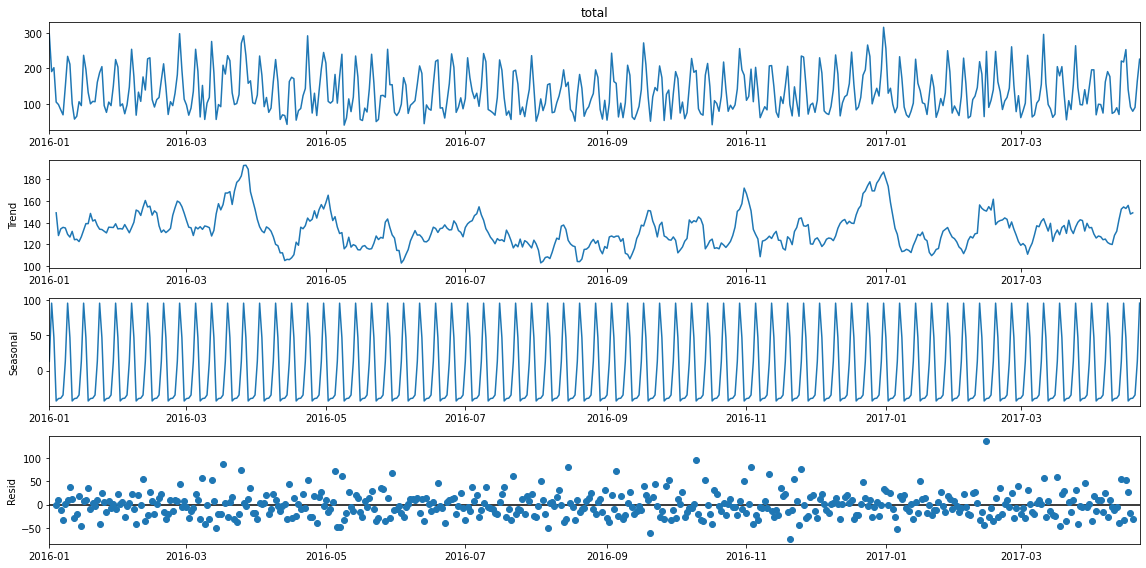

In [57]:
plt.rc("figure", figsize = (16, 8))
result = seasonal_decompose(df1['total'])
result.plot();

### Auto-ARIMA

In [34]:
auto_arima(df1['total'], seasonal = True, m = 7, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.33 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=0.69 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4796.064, Time=0.49 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.24 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4954.414, Time=1.06 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.51 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4767.665, Time=0.45 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2379.833
Date:                   Tue, 10 May 2022   AIC                           4767.665
Time:                           16:00:36   BIC                           4784.344
Sample:                                0   HQIC                          4774.222
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9418      1.258      2.339      0.019       0.477       5.407
ar.S.L7        0.9756      0.010     96.275      0.000       0.956       0.996
ma.S.L7       -0.8224      0.043    -19.152      0.000      -0.907      -0.738
sigma2      1210.2301     71.184     17.001      0.000    1070.712    1349.748
===================================================================================
Ljung-Box (L1) (Q):                  16.37   Jarque-Bera (JB):                81.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.83
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Using best model

In [35]:
train = df1.iloc[:436]
test = df1.iloc[436:]
len(test)

42

In [36]:
model = SARIMAX(train['total'], order = (0, 0, 0), seasonal_order = (1, 0, 1, 7)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Tue, 10 May 2022   AIC                           4336.738
Time:                           16:00:36   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.199      0.000      -0.985      -0.891
sigma2      1111.8059     58.739     18.928      0.000     996.679    1226.933
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

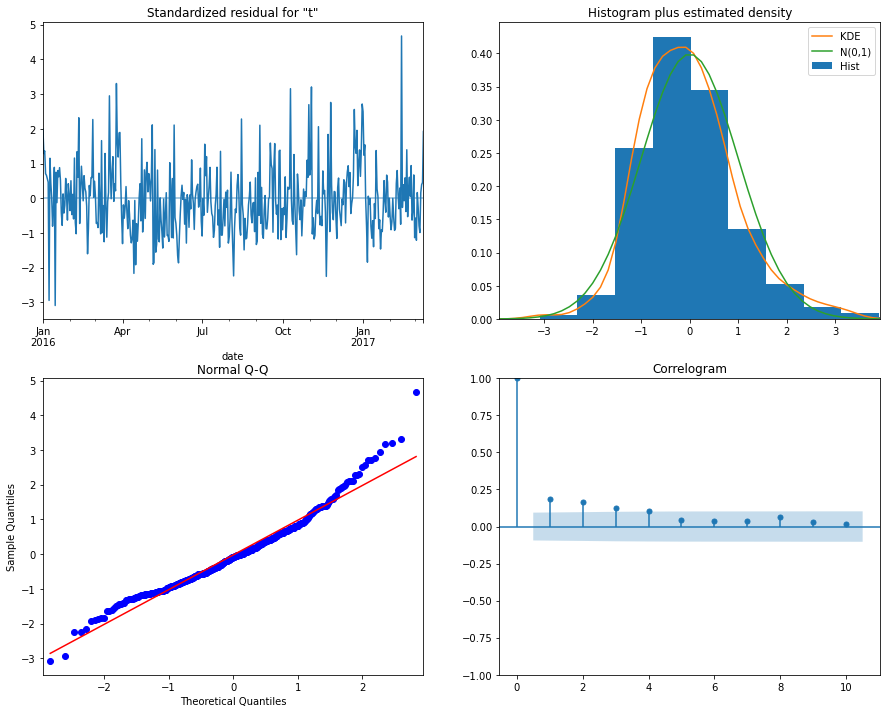

In [37]:
model.plot_diagnostics(figsize = (15, 12));

### Forecasting using the model

In [38]:
start = len(train)
end = start + len(test) - 1
predictions = model.predict(start = start, end = end, dynamic = False).rename('SARIMA')

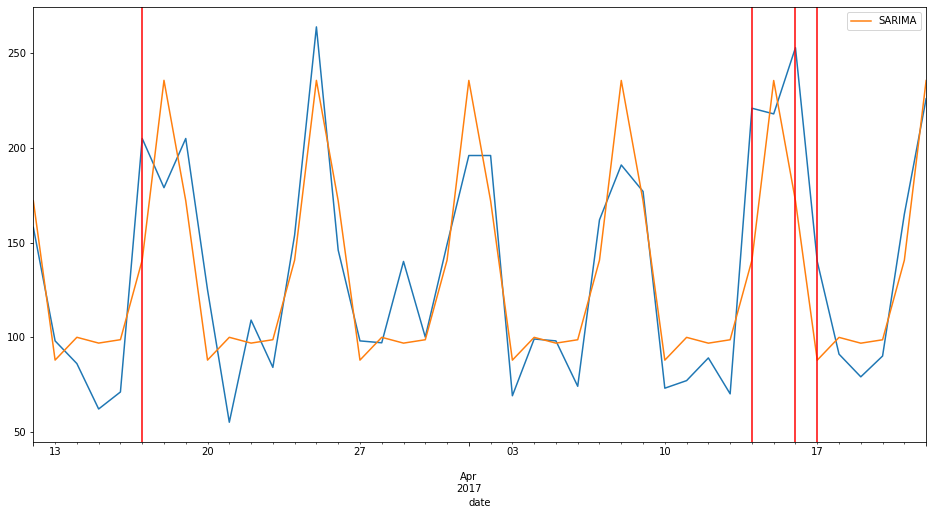

In [39]:
ax = test['total'].plot()
predictions.plot(legend = True)
for x in test.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

In [40]:
mean_absolute_percentage_error(test['total'], predictions)

0.20156822656850437

### Exogeneus model using holidays as variables

In [41]:
modelExog = SARIMAX(train['total'], exog = train['holiday'], order = (0, 0, 0), seasonal_order = (1, 0, 1, 7)).fit()
modelExog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2098.412
Date:                   Tue, 10 May 2022   AIC                           4204.823
Time:                           16:00:37   BIC                           4221.134
Sample:                       01-01-2016   HQIC                          4211.260
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6557      3.969     17.551      0.000      61.877      77.435
ar.S.L7        0.9999   7.58e-05   1.32e+04      0.000       1.000       1.000
ma.S.L7       -0.9429      0.023    -40.376      0.000      -0.989      -0.897
sigma2       813.6634     47.394     17.168      0.000     720.774     906.553
===================================================================================
Ljung-Box (L1) (Q):                  15.57   Jarque-Bera (JB):                20.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.23
Prob(H) (two-sided):                  1.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
predictionsExog = modelExog.predict(start = start, end = end, exog = test['holiday'], dynamic = False).rename('SARIMAX')

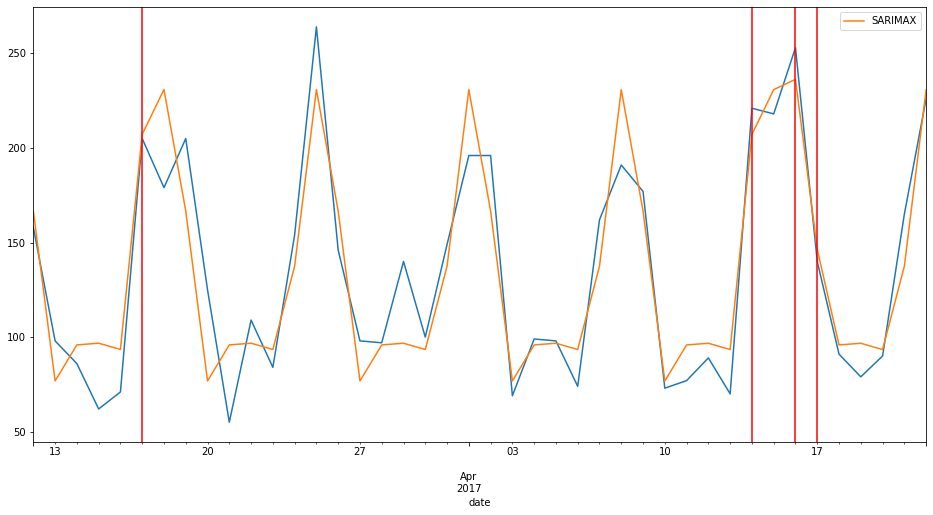

In [80]:
ax = test['total'].plot()
predictionsExog.plot(legend = True)
for x in test.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

In [44]:
mean_absolute_percentage_error(test['total'], predictionsExog)

0.1614361126766291

# Start of lecture 9 - Prophet

In [45]:
from prophet import Prophet

In [46]:
data = train.reset_index()[['date', 'total']]
data.columns = ['ds', 'y']
data

,ds,y
0,2016-01-01,296
1,2016-01-02,191
2,2016-01-03,202
3,2016-01-04,105
4,2016-01-05,98
...,...,...
431,2017-03-07,69
432,2017-03-08,102
433,2017-03-09,111
434,2017-03-10,155


### Model is an instance of class prophet

In [50]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future = model.make_future_dataframe(len(test))

### Forecast using model

In [54]:
forecast = model.predict(future)

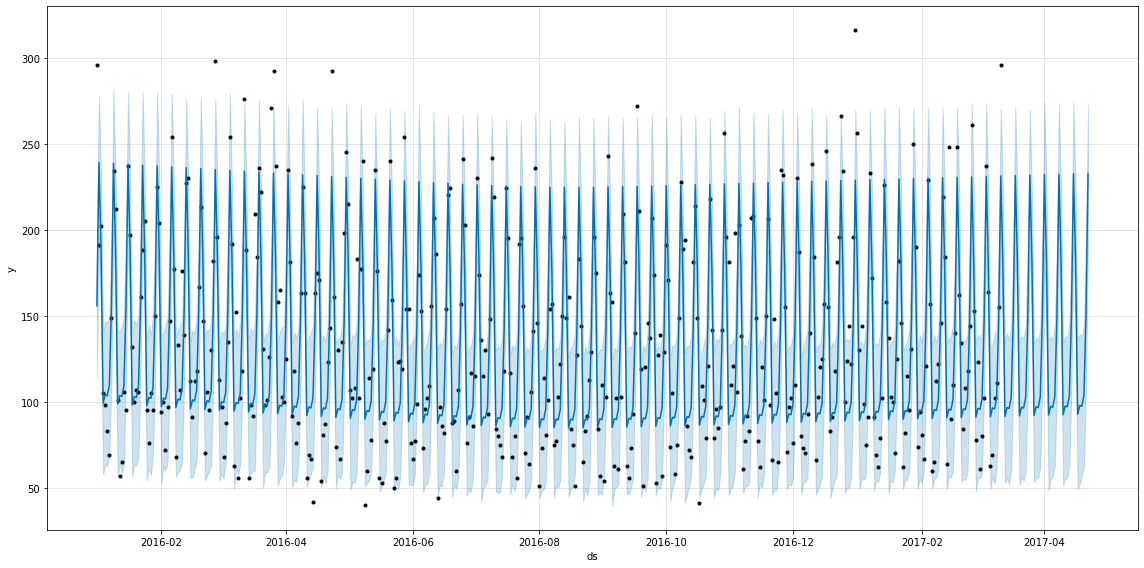

In [65]:
model.plot(forecast, figsize = (16, 8));

In [66]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,143.188687,113.452204,197.102408,143.188687,143.188687,12.678849,12.678849,12.678849,12.678849,12.678849,12.678849,0.0,0.0,0.0,155.867536
1,2016-01-02,143.115369,195.981253,277.924544,143.115369,143.115369,96.025015,96.025015,96.025015,96.025015,96.025015,96.025015,0.0,0.0,0.0,239.140384
2,2016-01-03,143.042050,149.108316,231.537594,143.042050,143.042050,45.969125,45.969125,45.969125,45.969125,45.969125,45.969125,0.0,0.0,0.0,189.011175
3,2016-01-04,142.968732,57.977038,140.980676,142.968732,142.968732,-43.736591,-43.736591,-43.736591,-43.736591,-43.736591,-43.736591,0.0,0.0,0.0,99.232141
4,2016-01-05,142.895413,63.093533,146.303756,142.895413,142.895413,-38.688430,-38.688430,-38.688430,-38.688430,-38.688430,-38.688430,0.0,0.0,0.0,104.206983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2017-04-18,136.572149,51.893374,139.235055,136.370189,136.790702,-38.688430,-38.688430,-38.688430,-38.688430,-38.688430,-38.688430,0.0,0.0,0.0,97.883719
474,2017-04-19,136.606695,57.832067,138.379362,136.398106,136.835220,-39.203611,-39.203611,-39.203611,-39.203611,-39.203611,-39.203611,0.0,0.0,0.0,97.403084
475,2017-04-20,136.641240,61.765012,143.949909,136.426072,136.881257,-33.044357,-33.044357,-33.044357,-33.044357,-33.044357,-33.044357,0.0,0.0,0.0,103.596883
476,2017-04-21,136.675786,108.424551,194.125381,136.453907,136.927415,12.678849,12.678849,12.678849,12.678849,12.678849,12.678849,0.0,0.0,0.0,149.354635


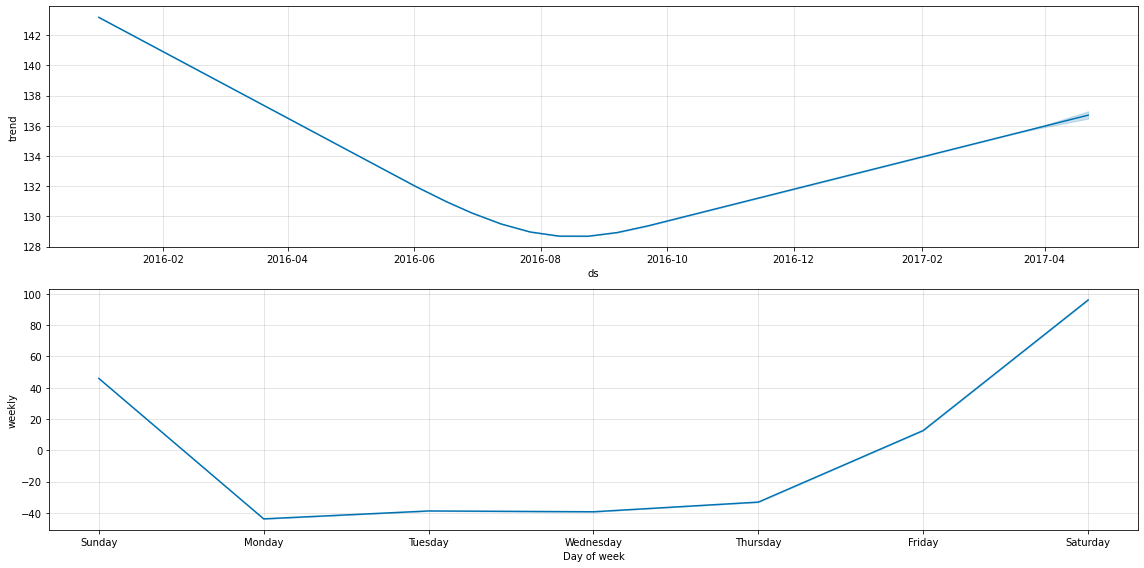

In [69]:
model.plot_components(forecast, figsize = (16, 8));

### Picking out only columns we care about to turn back into a normal dataframe

In [72]:
prophetForecast = forecast[['ds', 'yhat']].iloc[-len(test):]
prophetForecast.set_index('ds', inplace = True)
prophetForecast.index.name = 'date'
prophetForecast.columns = ['total']
prophetForecast.index.freq = 'D'
prophetForecast

,total
date,
2017-03-12,181.263088
2017-03-13,91.591918
2017-03-14,96.674624
2017-03-15,96.193989
2017-03-16,102.387788
2017-03-17,148.145540
2017-03-18,231.526251
2017-03-19,181.504907
2017-03-20,91.833737


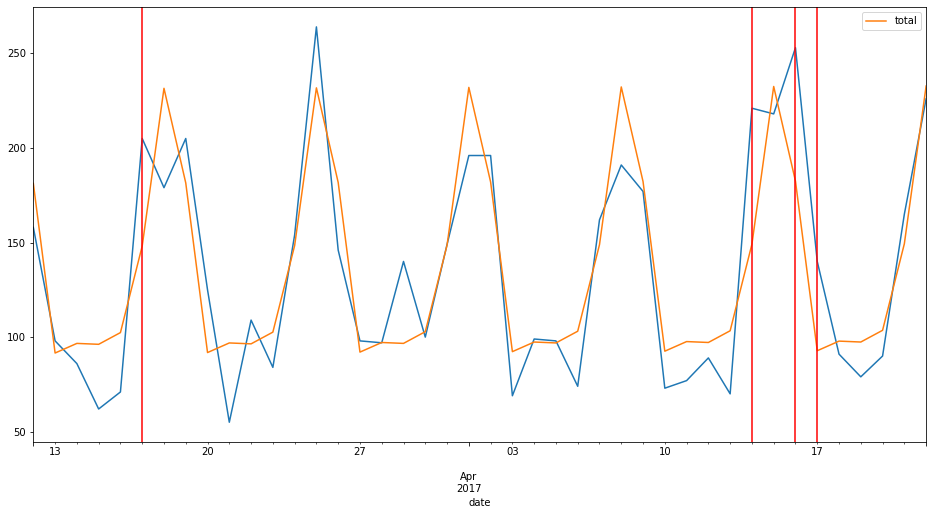

In [78]:
ax = test['total'].plot(figsize = (16, 8))
prophetForecast['total'].plot(legend = True)
for x in test.query('holiday == 1').index:
    ax.axvline(x = x, color = 'r')

In [79]:
mean_absolute_percentage_error(test['total'], prophetForecast['total'])

0.19578190641062032

### Something more complex

In [81]:
model_params = {'daily_seasonality' : False, 'yearly_seasonality' : False}
model = Prophet(** model_params)